# Cálculo  de Efectividad por campaña y venta

Para hacer este ejercicio voy a utilizar Python y las 3 librerías que importo en la sigiuente celda. 
- Pandas nos permite cargar y explorar los datos rápidamente, además utiliza internamente Numpy para hacer operaciones con vectores y matrices de manera eficiente.
- Geopandas y y el tipo _Punto_ de Shapely nos permitirán operar con datos geoespaciales de manera sencillas y eficiente.

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Data Exploration

Empiezo cargando los datasets y asegurándome de que tienen el tipo correcto. 
Para representar las latitudes y longitudes de restaurantes y campañas, voy a utilizar el tipo Point de la librería Shapely y la librería GeoPandas, lo que me permitirá representar en un mapa todos los puntos y calcular la distancia entre ellos con facilidad y rapidez. 

In [2]:
#Mapamundi para poder verificar la localización de restaurantes y campañas.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

### Cargamos y revisamos Ventas

In [3]:
sales = pd.read_csv("./data/ventas.csv", names=["timestamp", "restaurant_id", "amount"])
sales

,timestamp,restaurant_id,amount
0,1420066893000,57,160.90
1,1420067011000,97,111.67
2,1420067190000,38,59.66
3,1420067213000,71,243.20
4,1420067268000,72,94.59
...,...,...,...
1181030,1435701313000,36,217.80
1181031,1435701328000,58,140.92
1181032,1435701347000,2,96.67
1181033,1435701397000,29,281.24


In [4]:
sales.dtypes

timestamp          int64
restaurant_id      int64
amount           float64
dtype: object

In [5]:
sales.describe()

,timestamp,restaurant_id,amount
count,1.181035e+06,1.181035e+06,1.181035e+06
mean,1.427895e+12,5.003216e+01,1.513954e+02
std,4.516218e+09,2.886015e+01,1.531773e+03
min,1.420067e+12,0.000000e+00,0.000000e+00
25%,1.423986e+12,2.500000e+01,7.500000e+01
50%,1.427911e+12,5.000000e+01,1.500100e+02
75%,1.431804e+12,7.500000e+01,2.248600e+02
max,1.435702e+12,1.000000e+02,1.662151e+06


### Cargamos y revisamos Restaurantes

In [6]:
restaurants = pd.read_csv("./data/restaurantes.csv", index_col='id')
restaurants = gpd.GeoDataFrame(restaurants, geometry=gpd.points_from_xy(restaurants.long, restaurants.lat))

In [7]:
restaurants

,punto,lat,long,geometry
id,,,,
1,01010000008F9911990F1F0140E390BF99FAAA4440,41.335773,2.140166,POINT (2.14017 41.33577)
2,0101000000F71502CAB7E700401E3EA2CB72B64440,41.425378,2.113144,POINT (2.11314 41.42538)
3,01010000003633BD643B0E0140C1ED277D08A64440,41.297134,2.131949,POINT (2.13195 41.29713)
4,01010000003C83DF8E97070140C9514B06CCB54440,41.420289,2.128707,POINT (2.12871 41.42029)
5,0101000000ECF871CFE8BE0040A0F4FF8D4DAA4440,41.330492,2.093217,POINT (2.09322 41.33049)
...,...,...,...,...
96,0101000000F831055E111421C0C9EB2588B2704540,42.880448,-8.539195,POINT (-8.53920 42.88045)
97,01010000004C7CA189470321C05DFBE3A2776F4540,42.870839,-8.506405,POINT (-8.50641 42.87084)
98,010100000091F69B79AE0121C0970202C2506C4540,42.846215,-8.503284,POINT (-8.50328 42.84621)


In [8]:
restaurants.dtypes

punto         object
lat          float64
long         float64
geometry    geometry
dtype: object

In [9]:
restaurants.describe()

,lat,long
count,100.000000,100.000000
mean,40.512146,-4.012989
std,2.011435,3.957502
min,37.344237,-8.564844
25%,39.593448,-6.636705
50%,40.895159,-4.866252
75%,41.796132,-2.168827
max,42.912547,2.184813


<AxesSubplot:>

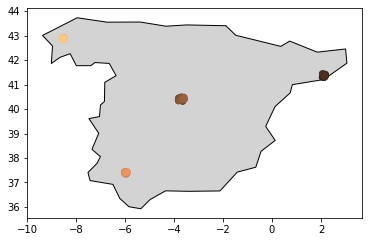

In [10]:
ax = world[world.name == 'Spain'].plot(color='lightgrey', edgecolor='black')
restaurants.plot(ax=ax,cmap="copper", cax=1)

### Cargamos y revisamos Campañas

In [11]:
campaigns = pd.read_csv("./data/publicidad.csv", names=["timestamp", "lat", "long", "volume"])
campaigns = gpd.GeoDataFrame(campaigns, geometry=gpd.points_from_xy(campaigns.long, campaigns.lat))

In [12]:
campaigns.head()

,timestamp,lat,long,volume,geometry
0,1420099740000,42.898177,-8.512549,2116,POINT (-8.51255 42.89818)
1,1420099800000,37.359507,-5.937782,253,POINT (-5.93778 37.35951)
2,1420099920000,41.414480,2.149441,1018,POINT (2.14944 41.41448)
3,1420099980000,40.404021,-3.680018,16,POINT (-3.68002 40.40402)
4,1420100280000,41.308698,2.149767,1264,POINT (2.14977 41.30870)


In [13]:
campaigns.dtypes

timestamp       int64
lat           float64
long          float64
volume          int64
geometry     geometry
dtype: object

In [14]:
campaigns.describe()

,timestamp,lat,long,volume
count,2.172000e+03,2172.000000,2172.000000,2172.000000
mean,1.427874e+12,40.521193,-4.018679,1498.843462
std,4.513831e+09,2.068188,3.936007,876.499235
min,1.420100e+12,37.342038,-18.779470,-999.000000
25%,1.423988e+12,40.332527,-6.022305,745.500000
50%,1.427873e+12,40.504060,-3.831118,1490.500000
75%,1.431761e+12,41.459796,-3.555260,2262.750000
max,1.435649e+12,64.732709,2.185951,3000.000000


<AxesSubplot:>

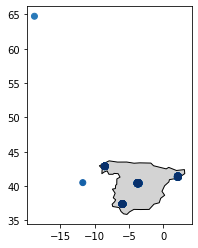

In [15]:
ax = world[world.name == 'Spain'].plot(color='lightgrey', edgecolor='black')
campaigns.plot(ax=ax, cmap='Blues')

Al revisar el resultado vemos que hay dos campañas que tienen datos de localización erróneos y que deberemos tratar posteriormente.

### Añadimos geolocalización a las ventas.

Para reducir el número de datasets con los que tenemos que operar, añadimos la geolocalizacion a cada una de las ventas. 
Hacemos esto fusionando el dataset de ventas con el de restaurantes.

Al verificar la fusión de los dos datasets, vemos que hay ventas asignadas a un restaurante que no tenemos en nuestro dataset, por lo que no podemos utilizar esas ventas para el cálculo posterior.

In [16]:
sales_restaurants_by_id = sales.merge(restaurants, left_on='restaurant_id', right_on='id', how='left')
sales_geo = gpd.GeoDataFrame(sales_restaurants_by_id)
sales_geo

,timestamp,restaurant_id,amount,punto,lat,long,geometry
0,1420066893000,57,160.90,01010000008EBFFED63A1218C057C5DA4422B14240,37.383858,-6.017803,POINT (-6.01780 37.38386)
1,1420067011000,97,111.67,01010000004C7CA189470321C05DFBE3A2776F4540,42.870839,-8.506405,POINT (-8.50641 42.87084)
2,1420067190000,38,59.66,01010000001A1C6642265C0DC09452AFC93D374440,40.431573,-3.669995,POINT (-3.66999 40.43157)
3,1420067213000,71,243.20,01010000002A19B3D31FC317C0048B2B6248B74240,37.431896,-5.940551,POINT (-5.94055 37.43190)
4,1420067268000,72,94.59,0101000000B4747A6058AC17C067B188682CB54240,37.415418,-5.918306,POINT (-5.91831 37.41542)
...,...,...,...,...,...,...,...
1181030,1435701313000,36,217.80,01010000002EB2FC12E2970EC0D6AE95CF6A304440,40.378260,-3.824162,POINT (-3.82416 40.37826)
1181031,1435701328000,58,140.92,0101000000C96DF5F78DC017C0E0EC563EC8B04240,37.381111,-5.938042,POINT (-5.93804 37.38111)
1181032,1435701347000,2,96.67,0101000000F71502CAB7E700401E3EA2CB72B64440,41.425378,2.113144,POINT (2.11314 41.42538)
1181033,1435701397000,29,281.24,0101000000CE688D58B6880EC070F934C9B4374440,40.435205,-3.816754,POINT (-3.81675 40.43520)


In [17]:
sales_geo[sales_geo.geometry.isnull()]

,timestamp,restaurant_id,amount,punto,lat,long,geometry
914,1420097186000,0,279.46,NaN,NaN,NaN,None
977,1420097329000,0,161.19,NaN,NaN,NaN,None
1297,1420098136000,0,257.29,NaN,NaN,NaN,None
1342,1420098221000,0,256.16,NaN,NaN,NaN,None
1502,1420098581000,0,136.42,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...
1179853,1435691802000,0,91.76,NaN,NaN,NaN,None
1180255,1435692777000,0,39.73,NaN,NaN,NaN,None
1180486,1435693351000,0,230.83,NaN,NaN,NaN,None
1180487,1435693353000,0,250.72,NaN,NaN,NaN,None


# Construimos el algoritmo para una venta

### Para tener una primera evaluación de las dificultades que plantea el problema lo más rápido posible, voy a empezar por hacer un prototipo del algoritmo que compute la eficiencia de una sola venta para todas las campañas.

In [18]:
# Filtramos una venta
ex_sale = sales_geo.loc[100000].copy()

In [19]:
dmax = 5 # km max distance between sales and campaign.
dtmax = 168 # hours.

Computamos la distancia física en kilómetros de todas las campañas respecto de la venta _ex_sale_. Utilizamos geopandas para hacerlo todo en una sola operación, mediante vectorización.

In [20]:
das = campaigns['geometry'].distance(ex_sale['geometry'])
das

0       6.052588
1       0.066623
2       9.008428
3       3.731504
4       8.962382
          ...   
2167    6.050800
2168    8.896976
2169    6.037222
2170    8.947803
2171    0.020708
Length: 2172, dtype: float64

Computamos la distancia temporal en horas de todas las campañas respecto de la venta _ex_sale_. igual que antes, utilizamos pandas para vectorizar la operación y no tener que iterar por cada campaña.

In [21]:
dtas = pd.Series([(ex_sale['timestamp'] - campaign_timestamp)/3600000 for campaign_timestamp in campaigns['timestamp']])
dtas

0        360.163889
1        360.147222
2        360.113889
3        360.097222
4        360.013889
           ...     
2167   -3959.069444
2168   -3959.086111
2169   -3959.119444
2170   -3959.152778
2171   -3959.202778
Length: 2172, dtype: float64

Extraemos del dataset de campañas la cantidad de panfletos repartidos para cada campaña.

In [22]:
pas = campaigns['volume']
pas

0       2116
1        253
2       1018
3         16
4       1264
        ... 
2167    2571
2168    2677
2169    2608
2170     720
2171    1897
Name: volume, Length: 2172, dtype: int64

Agrupamos las 3 variables en una nueva matriz

In [23]:
stg_values = pd.DataFrame({
        "das" : das,
        "dtas": dtas,
        "pas" : pas,
    })
stg_values

,das,dtas,pas
0,6.052588,360.163889,2116
1,0.066623,360.147222,253
2,9.008428,360.113889,1018
3,3.731504,360.097222,16
4,8.962382,360.013889,1264
...,...,...,...
2167,6.050800,-3959.069444,2571
2168,8.896976,-3959.086111,2677
2169,6.037222,-3959.119444,2608
2170,8.947803,-3959.152778,720


Filtramos los valores que cumplen con las condiciones definidas: campañas ocurridas 168 horas antes de la venta a una distancia inferior a 5km del punto de venta.

In [24]:
ex_sale_values = stg_values[(stg_values['das']) <= dmax & (stg_values['dtas'] <= dtmax) & (stg_values['dtas'] > 0 )].copy()
ex_sale_values

,das,dtas,pas
107,0.096240,167.863889,1954
109,0.015492,144.130556,755
112,0.033291,144.080556,1167
114,0.047181,143.997222,130
122,0.070571,120.080556,831
131,0.088761,119.763889,2982
133,0.068475,96.130556,457
138,0.063158,96.047222,8
149,0.010036,72.063889,229
157,0.098097,48.113889,1140


Computamos el numerador del índice de eficacia de cada campaña sobre la venta _ex_sale_ y todas las campañas que cumplen los criterios.

In [25]:
numerators = ex_sale_values['pas']/((ex_sale_values['das']/dmax)**2 + (ex_sale_values['dtas']/dtmax)**2)
numerators

107    1.956444e+03
109    1.025765e+03
112    1.586545e+03
114    1.769298e+02
122    1.625941e+03
131    5.864152e+03
133    1.394965e+03
138    2.446397e+01
149    1.244541e+03
157    1.383404e+04
159    5.811282e+03
167    2.913664e+04
173    8.056331e+04
175    1.813171e+04
176    1.658441e+04
182    1.496587e+07
186    2.940121e+06
dtype: float64

Para computar el denominador del algoritmo sumamos los valores del numerador para cada campaña.

In [26]:
denominator = numerators.sum()
denominator

18084956.47399354

Completamos la operación, obteniendo un vector con el índice de eficienca de cada campaña sobre la venta _ex_sale_.

In [27]:
effectiveness = numerators / denominator * ex_sale['amount']


In [28]:
campaigns['effectiveness'] = effectiveness
campaigns[campaigns['effectiveness'].notnull()]

,timestamp,lat,long,volume,geometry,effectiveness
107,1420792020000,37.404649,-6.021589,1954,POINT (-6.02159 37.40465),0.022980
109,1420877460000,37.417394,-5.940895,755,POINT (-5.94090 37.41739),0.012048
112,1420877640000,37.392195,-5.924567,1167,POINT (-5.92457 37.39220),0.018635
114,1420877940000,37.378505,-5.933250,130,POINT (-5.93325 37.37851),0.002078
122,1420964040000,37.396147,-5.991848,831,POINT (-5.99185 37.39615),0.019098
131,1420965180000,37.356490,-5.983611,2982,POINT (-5.98361 37.35649),0.068878
133,1421050260000,37.362092,-5.953823,457,POINT (-5.95382 37.36209),0.016385
138,1421050560000,37.362726,-5.919387,8,POINT (-5.91939 37.36273),0.000287
149,1421136900000,37.420868,-5.918620,229,POINT (-5.91862 37.42087),0.014618
157,1421223120000,37.348352,-5.988385,1140,POINT (-5.98839 37.34835),0.162490


In [29]:
campaigns['effectiveness'].describe()

count     17.000000
mean      12.495294
std       42.894909
min        0.000287
25%        0.016385
50%        0.068257
75%        0.212969
max      175.784275
Name: effectiveness, dtype: float64

# 1a Implementación: Iterando sobre las ventas.

Esta primera implementación vamos a ejecutar el algoritmo que acabamos de definir sobre cada una de las ventas. Encapsulamos los procesos descritos anteriormente en funciones para que resulte más fácil hacer pruebas con ellos, reutilizarlos y/o adaptarlos posteriormente a los cambios que necesitemos.

Las dos funciones públicas _raw_data_prep_ y _compute_effectiveness_ agrupan los procesos de preparación de datos y cálculo del índice, respectivamente. 

In [30]:
def _load_data():
    sales = pd.read_csv("./data/ventas.csv", names=["timestamp", "restaurant_id", "amount" ])
    restaurants = pd.read_csv("./data/restaurantes.csv")
    campaigns = pd.read_csv("./data/publicidad.csv", names=["timestamp", "lat", "long", "volume"])
    return {
        "sales": sales,
        "restaurants": restaurants,
        "campaigns":campaigns
    }

def _build_geodf(df):
    return gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.lat))

def _add_sales_geopoints(sales, restaurants):
    sales_with_restaurants = sales.merge(restaurants, left_on='restaurant_id', right_on='id', how='left')
    sales_geo = gpd.GeoDataFrame(sales_with_restaurants)
    sales = sales_geo[sales_geo['geometry'].notnull()].copy()
    return sales

def raw_data_prep():
    data = _load_data()
    restaurants = _build_geodf(data['restaurants'])
    campaigns = _build_geodf(data['campaigns'])
    sales = _add_sales_geopoints(data['sales'], restaurants)
    return {
        "sales": sales,
        "restaurants": restaurants,
        "campaigns":campaigns
    }

def _build_algorithm_operands(sale, campaigns):
    das = campaigns['geometry'].distance(sale['geometry'])
    dtas = pd.Series([(sale['timestamp'] - campaign_timestamp)/3600000 for campaign_timestamp in campaigns['timestamp']], dtype='float64')
    pas = campaigns['volume']
    return pd.DataFrame({
        "das" : das,
        "dtas": dtas,
        "pas" : pas,
    })

def _filter_relevant_campaigns(operands, dmax, dtmax):
    return operands[(operands['das']) <= dmax & (operands['dtas'] <= dtmax) & (operands['dtas'] > 0 )].copy()

def _add_campaigns_effectiveness(effectiveness, campaigns):
    """
    Suma el indice de efectividad al previamente existente. 
    """
    if 'effectiveness' not in campaigns.columns:
        campaigns['effectiveness'] = pd.Series([], dtype='float64') 
    campaigns['effectiveness'] = campaigns['effectiveness'].add(effectiveness, fill_value=0)
    return campaigns

def compute_effectiveness(sale, campaigns, dmax=5, dtmax=168):
    operands = _build_algorithm_operands(sale, campaigns)
    operands = _filter_relevant_campaigns(operands, dmax, dtmax)
    numerators = operands['pas']/((operands['das']/dmax)**2 + (operands['dtas']/dtmax)**2)
    denominator = numerators.sum()
    operands['effectiveness'] = numerators / denominator * operands['pas']
    _add_campaigns_effectiveness(operands['effectiveness'], campaigns)
    return campaigns

# Pruebas

Testeamos la eficiencia del algoritmo. Utilizamos el método _iterrows_ del DataFrame para iterar por cada venta. Vemos que la función de coste de _compute_effectiveness_ crece de manera lineal, en función del número de ventas.

In [31]:
%%time
data = raw_data_prep()

CPU times: user 1.93 s, sys: 36.9 ms, total: 1.97 s
Wall time: 1.97 s


In [32]:
%%time
compute_effectiveness(data['sales'].loc[10000], data['campaigns'])

CPU times: user 22.1 ms, sys: 497 µs, total: 22.6 ms
Wall time: 21.8 ms


,timestamp,lat,long,volume,geometry,effectiveness
0,1420099740000,42.898177,-8.512549,2116,POINT (-8.51255 42.89818),NaN
1,1420099800000,37.359507,-5.937782,253,POINT (-5.93778 37.35951),NaN
2,1420099920000,41.414480,2.149441,1018,POINT (2.14944 41.41448),13.434727
3,1420099980000,40.404021,-3.680018,16,POINT (-3.68002 40.40402),NaN
4,1420100280000,41.308698,2.149767,1264,POINT (2.14977 41.30870),21.139320
...,...,...,...,...,...,...
2167,1435648980000,42.888337,-8.529124,2571,POINT (-8.52912 42.88834),NaN
2168,1435649040000,41.337575,2.063059,2677,POINT (2.06306 41.33758),NaN
2169,1435649160000,42.865220,-8.545966,2608,POINT (-8.54597 42.86522),NaN
2170,1435649280000,41.416287,2.080868,720,POINT (2.08087 41.41629),NaN


In [38]:
%%time
effectiveness = [compute_effectiveness(sale, data['campaigns']) for idx, sale in data['sales'][10000:10100].iterrows()]

CPU times: user 1.8 s, sys: 0 ns, total: 1.8 s
Wall time: 1.8 s


In [151]:
%%time
effectiveness = [compute_effectiveness(sale, data['campaigns']) for idx, sale in data['sales'][10000:11000].iterrows()]

CPU times: user 20.9 s, sys: 0 ns, total: 20.9 s
Wall time: 20.9 s


In [152]:
%%time
effectiveness = [compute_effectiveness(sale, data['campaigns']) for idx, sale in data['sales'][10000:20000].iterrows()]

CPU times: user 3min 33s, sys: 0 ns, total: 3min 33s
Wall time: 3min 33s


In [134]:
effectiveness[0]

,timestamp,lat,long,volume,geometry,effectiveness
0,1420099740000,42.898177,-8.512549,2116,POINT (-8.51255 42.89818),1.223800e+06
1,1420099800000,37.359507,-5.937782,253,POINT (-5.93778 37.35951),4.368746e+03
2,1420099920000,41.414480,2.149441,1018,POINT (2.14944 41.41448),3.891512e+04
3,1420099980000,40.404021,-3.680018,16,POINT (-3.68002 40.40402),2.067452e+01
4,1420100280000,41.308698,2.149767,1264,POINT (2.14977 41.30870),6.033798e+04
...,...,...,...,...,...,...
2167,1435648980000,42.888337,-8.529124,2571,POINT (-8.52912 42.88834),NaN
2168,1435649040000,41.337575,2.063059,2677,POINT (2.06306 41.33758),NaN
2169,1435649160000,42.865220,-8.545966,2608,POINT (-8.54597 42.86522),NaN
2170,1435649280000,41.416287,2.080868,720,POINT (2.08087 41.41629),NaN


# 2a implementación: sin iterrows

Esta es una implementación similar a la anterior, pero en lugar de utilizar el método iterrows, extraemos del DataFrame los vectores (pd.Series) que necesitamos y hacemos una _comprehension list_ directa.

Reimplementamos las funciones 

In [33]:
def _build_algorithm_operands(time, geom, campaigns):
    das = campaigns['geometry'].distance(geom)
    dtas = pd.Series([(time - campaign_timestamp)/3600000 for campaign_timestamp in campaigns['timestamp']], dtype='float64')
    pas = campaigns['volume']
    return pd.DataFrame({
        "das" : das,
        "dtas": dtas,
        "pas" : pas,
    })
  

def compute_effectiveness(time, geom, campaigns, dmax=5, dtmax=168):
    operands = _build_algorithm_operands(time, geom, campaigns)
    operands = _filter_relevant_campaigns(operands, dmax, dtmax)
    numerators = operands['pas']/((operands['das']/dmax)**2 + (operands['dtas']/dtmax)**2)
    denominator = numerators.sum()
    operands['effectiveness'] = numerators / denominator * operands['pas']
    _add_campaigns_effectiveness(operands['effectiveness'], campaigns)
    return campaigns

In [34]:
%%time
data = raw_data_prep()

CPU times: user 1.93 s, sys: 30 ms, total: 1.96 s
Wall time: 1.96 s


In [35]:
%%time
sales = data['sales'].copy()
campaigns = data['campaigns'].copy()
ef = compute_effectiveness(sales['timestamp'].loc[10000], sales['geometry'].loc[10000], campaigns)

CPU times: user 49.5 ms, sys: 226 µs, total: 49.7 ms
Wall time: 48.1 ms


In [36]:
%%time
sales = data['sales'].copy()
campaigns = data['campaigns'].copy()
effectiveness = [compute_effectiveness(time, geom, campaigns) for time, geom in zip(sales['timestamp'][10000:10100], sales['geometry'][10000:10100]) ]

CPU times: user 1.35 s, sys: 0 ns, total: 1.35 s
Wall time: 1.35 s


In [43]:
%%time
sales = data['sales'].copy()
campaigns = data['campaigns'].copy()
effectiveness = [compute_effectiveness(time, geom, campaigns) for time, geom in zip(sales['timestamp'][10000:11000], sales['geometry'][10000:11000]) ]

CPU times: user 13.2 s, sys: 0 ns, total: 13.2 s
Wall time: 13.2 s


In [228]:
%%time
sales = data['sales'].copy()
campaigns = data['campaigns'].copy()
effectiveness = [compute_effectiveness(time, geom, campaigns) for time, geom in zip(sales['timestamp'][10000:20000], sales['geometry'][10000:20000]) ]

CPU times: user 2min 40s, sys: 0 ns, total: 2min 40s
Wall time: 2min 40s


In [253]:
effectiveness[0]

,timestamp,lat,long,volume,geometry,effectiveness
0,1420099740000,42.898177,-8.512549,2116,POINT (-8.51255 42.89818),1.062811e+06
1,1420099800000,37.359507,-5.937782,253,POINT (-5.93778 37.35951),3.977109e+03
2,1420099920000,41.414480,2.149441,1018,POINT (2.14944 41.41448),3.447218e+04
3,1420099980000,40.404021,-3.680018,16,POINT (-3.68002 40.40402),1.841580e+01
4,1420100280000,41.308698,2.149767,1264,POINT (2.14977 41.30870),5.344000e+04
...,...,...,...,...,...,...
2167,1435648980000,42.888337,-8.529124,2571,POINT (-8.52912 42.88834),NaN
2168,1435649040000,41.337575,2.063059,2677,POINT (2.06306 41.33758),NaN
2169,1435649160000,42.865220,-8.545966,2608,POINT (-8.54597 42.86522),NaN
2170,1435649280000,41.416287,2.080868,720,POINT (2.08087 41.41629),NaN


# Mecanismos para ganar velocidad de cómputo: Paralelización.

Vamos a implementar multiproceso para paralelizar el computo. Esto nos permitirá escalar de manera vertical. A mayor número de CPUs en la máquina que ejecuta el proceso, menor tiempo de ejecución.
Si fuese necesario, con una pequeña cantidad de cambios en el código, podríamos escalar también horizontalmente, a un sistema de computación distribuida, utilizando la librería Dask. 

In [38]:
import concurrent.futures

In [50]:
def compute_effectiveness(time, geom, campaigns, dmax=5, dtmax=168):
    operands = _build_algorithm_operands(time, geom, campaigns)
    operands = _filter_relevant_campaigns(operands, dmax, dtmax)
    numerators = operands['pas']/((operands['das']/dmax)**2 + (operands['dtas']/dtmax)**2)
    denominator = numerators.sum()
    operands['effectiveness'] = numerators / denominator * operands['pas']
    return operands['effectiveness']

def split_df(df, splits=12):
    rows = df.shape[0]
    split = rows // splits - 1
    df_splits = []
    start = 0
    for end in range(split, rows, split):
        df_splits.append(df.loc[start:end].copy())
        start = end + 1
    df_splits.append(df.loc[start:rows].copy())
    return df_splits

def compute_effectiveness_per_split(df_split, campaigns):
    effectiveness = [compute_effectiveness(time, geom, campaigns) for time, geom in zip(df_split['timestamp'], df_split['geometry'])]
    print('df_split processed')
    return effectiveness[0]

In [52]:
%%time
sales = data['sales'].copy()
campaigns = data['campaigns'].copy()
sales_df_splits = split_df(sales)

CPU times: user 34 ms, sys: 102 µs, total: 34.1 ms
Wall time: 31.3 ms


In [53]:
campaigns

,timestamp,lat,long,volume,geometry
0,1420099740000,42.898177,-8.512549,2116,POINT (-8.51255 42.89818)
1,1420099800000,37.359507,-5.937782,253,POINT (-5.93778 37.35951)
2,1420099920000,41.414480,2.149441,1018,POINT (2.14944 41.41448)
3,1420099980000,40.404021,-3.680018,16,POINT (-3.68002 40.40402)
4,1420100280000,41.308698,2.149767,1264,POINT (2.14977 41.30870)
...,...,...,...,...,...
2167,1435648980000,42.888337,-8.529124,2571,POINT (-8.52912 42.88834)
2168,1435649040000,41.337575,2.063059,2677,POINT (2.06306 41.33758)
2169,1435649160000,42.865220,-8.545966,2608,POINT (-8.54597 42.86522)
2170,1435649280000,41.416287,2.080868,720,POINT (2.08087 41.41629)


In [54]:
sales

,timestamp,restaurant_id,amount,punto,id,lat,long,geometry
0,1420066893000,57,160.90,01010000008EBFFED63A1218C057C5DA4422B14240,57.0,37.383858,-6.017803,POINT (-6.01780 37.38386)
1,1420067011000,97,111.67,01010000004C7CA189470321C05DFBE3A2776F4540,97.0,42.870839,-8.506405,POINT (-8.50641 42.87084)
2,1420067190000,38,59.66,01010000001A1C6642265C0DC09452AFC93D374440,38.0,40.431573,-3.669995,POINT (-3.66999 40.43157)
3,1420067213000,71,243.20,01010000002A19B3D31FC317C0048B2B6248B74240,71.0,37.431896,-5.940551,POINT (-5.94055 37.43190)
4,1420067268000,72,94.59,0101000000B4747A6058AC17C067B188682CB54240,72.0,37.415418,-5.918306,POINT (-5.91831 37.41542)
...,...,...,...,...,...,...,...,...
10030,1420221277000,65,25.65,01010000004AAC4AAF831218C096FFC71F5BB64240,65.0,37.424656,-6.018080,POINT (-6.01808 37.42466)
10031,1420221302000,34,119.03,0101000000E23A7A0B31560DC07C5FDAC379314440,34.0,40.386528,-3.667086,POINT (-3.66709 40.38653)
10032,1420221313000,31,24.61,0101000000155F427176700DC09AE4B9D4C5364440,31.0,40.427912,-3.679913,POINT (-3.67991 40.42791)
10033,1420221705000,60,193.03,0101000000EB14C466B6B917C036DECCD87EAF4240,60.0,37.371059,-5.931360,POINT (-5.93136 37.37106)


In [55]:
%%time
with concurrent.futures.ProcessPoolExecutor() as executor:
    results = [executor.submit(compute_effectiveness_per_split, df_split, campaigns) for df_split in sales_df_splits]
    for future in concurrent.futures.as_completed(results):
        effectiveness = future.result()
        _add_campaigns_effectiveness(future.result(), campaigns)

df_split processed
df_split processed
df_split processed
df_split processed
df_split processed
df_split processed
df_split processed
df_split processed
df_split processed
df_split processed
df_split processed
df_split processed
df_split processed
CPU times: user 476 ms, sys: 129 ms, total: 604 ms
Wall time: 29.4 s


In [57]:
campaigns[campaigns['effectiveness'].notnull()]

,timestamp,lat,long,volume,geometry,effectiveness
0,1420099740000,42.898177,-8.512549,2116,POINT (-8.51255 42.89818),2116.000000
1,1420099800000,37.359507,-5.937782,253,POINT (-5.93778 37.35951),10.059724
2,1420099920000,41.414480,2.149441,1018,POINT (2.14944 41.41448),215.640225
3,1420099980000,40.404021,-3.680018,16,POINT (-3.68002 40.40402),0.416098
4,1420100280000,41.308698,2.149767,1264,POINT (2.14977 41.30870),359.408068
5,1420100400000,41.431968,2.106868,2638,POINT (2.10687 41.43197),1470.086810
6,1420100520000,40.363192,-3.630823,2511,POINT (-3.63082 40.36319),9988.761738
7,1420100640000,37.372664,-6.021478,2500,POINT (-6.02148 37.37266),848.737228
8,1420100700000,41.374447,2.105408,2781,POINT (2.10541 41.37445),1757.529469
9,1420100820000,37.364798,-5.930103,540,POINT (-5.93010 37.36480),52.696583


In [ ]:
campaigns[['timestamp', 'lat', 'long', 'effectiveness']].to_csv('./output/campaigns_effectiveness.csv')

# 3a Implementación. Iterando por las campañas para calcular todas las ventas afectadas por una campaña.

Para intentar ganar eficiencia en el proceso, vamos a pivotar el proceso de cálculo. En las implementaciones anteriores estábamos vectorizando los cálculos sobre la tabla campañas, e iterando sobre la tabla ventas. En esta implementación vamos a vectorizar los cálculos sobre ventas y a iterar sobre las campañas. Lo cual añade un grado de complejidad, dado que el índice de eficiencia para una campaña sobre una venta, requiere de calcular el índice del resto de campañas que influyen sobre esa venta. 

Esta implementación está incompleta. En el desarrollo señalo cuales son los puntos que faltaría implementar y posibles mecanismos de optimización.

Reimplementamos las funciones para obtener el das, y dtas de todas las ventas en una sola operación vectorial.

In [174]:
def _build_algorithm_operands(campaign, sales):
    campaign_geometry = campaign['geometry']
    campaign_timestamp = campaign['timestamp']
    das = sales.distance(campaign_geometry)
    dtas = (sales['timestamp'] - campaign_timestamp)/3600000
    return pd.DataFrame({
        "das" : das,
        "dtas": dtas,
        "amount" : sales['amount']
    })

def _filter_relevant_sales(operands, dmax, dtmax):
    relevant_operands = operands[(operands['das'] <= dmax) & (operands['dtas'] <= dtmax) & (operands['dtas'] > 0 )]
    return relevant_operands

def add_campaign_effectiveness(campaigns, idx, effectiveness):
    if 'effectiveness' not in campaigns.columns:
        campaigns['effectiveness'] = pd.Series([], dtype='float64')
    campaign_effectiveness = sum(effectiveness)
    campaigns.loc[idx, 'effectiveness'] = campaign_effectiveness

def compute_effectiveness(campaign, sales, dmax=5, dtmax=168):
    operands = _build_algorithm_operands(campaign, sales)
    operands = _filter_relevant_sales(operands, dmax, dtmax)
    numerators = (campaign['volume'] / ((operands['das'] / dmax) * 2 + (operands['dtas'] / dtmax) ** 2)) 
    denominator = numerators.sum()
    effectiveness = numerators / denominator * operands['amount']
    return effectiveness

In [49]:
data = raw_data_prep()

In [176]:
%%time
campaigns = data['campaigns'].loc[0:100].copy()
sales = data['sales'].copy()
for idx,campaign in campaigns.iterrows():
    effectiveness = compute_effectiveness(campaign, sales)
    add_campaign_effectiveness(campaigns, idx, effectiveness)

KeyboardInterrupt: 

In [366]:
%%time
campaigns = data['campaigns'].copy()
sales = data['sales'].copy()
for idx,campaign in campaigns.iterrows():
    effectiveness = compute_effectiveness(campaign, sales)
    add_campaign_effectiveness(campaigns, idx, effectiveness)

CPU times: user 11min 34s, sys: 64.4 ms, total: 11min 34s
Wall time: 11min 34s


In [367]:
campaigns[campaigns['effectiveness'].notnull()]

,timestamp,lat,long,volume,geometry,effectiveness
0,1420099740000,42.898177,-8.512549,2116,POINT (-8.51255 42.89818),149.724334
1,1420099800000,37.359507,-5.937782,253,POINT (-5.93778 37.35951),150.932075
2,1420099920000,41.414480,2.149441,1018,POINT (2.14944 41.41448),149.732765
3,1420099980000,40.404021,-3.680018,16,POINT (-3.68002 40.40402),151.181375
4,1420100280000,41.308698,2.149767,1264,POINT (2.14977 41.30870),150.843073
...,...,...,...,...,...,...
2167,1435648980000,42.888337,-8.529124,2571,POINT (-8.52912 42.88834),150.639749
2168,1435649040000,41.337575,2.063059,2677,POINT (2.06306 41.33758),149.108535
2169,1435649160000,42.865220,-8.545966,2608,POINT (-8.54597 42.86522),147.816585
2170,1435649280000,41.416287,2.080868,720,POINT (2.08087 41.41629),149.024134


In [368]:
campaigns.describe()

,timestamp,lat,long,volume,effectiveness
count,2.172000e+03,2172.000000,2172.000000,2172.000000,2172.000000
mean,1.427874e+12,40.521193,-4.018679,1498.843462,150.642023
std,4.513831e+09,2.068188,3.936007,876.499235,14.440593
min,1.420100e+12,37.342038,-18.779470,-999.000000,0.000000
25%,1.423988e+12,40.332527,-6.022305,745.500000,148.992292
50%,1.427873e+12,40.504060,-3.831118,1490.500000,150.024475
75%,1.431761e+12,41.459796,-3.555260,2262.750000,151.081047
max,1.435649e+12,64.732709,2.185951,3000.000000,606.161249


In [369]:
campaigns[['timestamp', 'lat', 'long', 'effectiveness']].to_csv('./output/campaigns_effectiveness.csv')